In [415]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [416]:
## meta data
data=[]
with open('bbc-news-data.csv','r') as f:
  for row in csv.reader(f):
    data.append(row[0].split('\t'))


## content of data
data_cont=[]
with open('bbc-news-data.csv','r') as f:
  for row in csv.reader(f):
    data_cont.append(row[1:])   

col=data[0]
df = pd.DataFrame(data[1:],columns=col) 


for i in range(len(data)):
  data_cont[i].insert(0, data[i][-1])
    


In [417]:
del df['content']
df['content_all']=data_cont[1:]
#df=df['category','file','title','content_all']


In [418]:
df['merged']=''
for i in range(df.shape[0]):
  df.merged[i] = ' '.join(df.iloc[i][3])

In [419]:
df.merged=df.merged.apply(lambda x: x.lower())
df.merged=df.merged.apply(lambda x: x.split())


In [420]:
def preprocess(value):
  return [x for x in value if x not in stopwords]
df.merged=df.merged.apply(lambda x: preprocess(x))


In [421]:

stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]


In [422]:
vocab_size = 55000
embedding_dim = 16
max_length = 250 # Expected max_len is 120 a few cells down.
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_portion = .8

In [423]:
training_portion=0.8
train_set=df.sample(int(df.shape[0]*training_portion))
eval_set=df.sample(int(df.shape[0]*(1-training_portion)))

In [424]:
tokenizer_text =Tokenizer(oov_token=oov_tok)
tokenizer_text.fit_on_texts(df.merged)
word_index = tokenizer_text.word_index

train_sequences = tokenizer_text.texts_to_sequences(train_set.merged)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


eval_sequences = tokenizer_text.texts_to_sequences(eval_set.merged)
eval_padded = pad_sequences(eval_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [440]:
tokenizer_label =Tokenizer()
tokenizer_label.fit_on_texts(df.category)
label_index = tokenizer_label.word_index

train_labels = np.array(tokenizer_label.texts_to_sequences(train_set.category))


eval_labels = np.array(tokenizer_label.texts_to_sequences(eval_set.category))


In [426]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 250, 16)           880000    
_________________________________________________________________
global_average_pooling1d_18  (None, 16)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_37 (Dense)             (None, 6)                 150       
Total params: 880,558
Trainable params: 880,558
Non-trainable params: 0
_________________________________________________________________


In [427]:
num_epochs = 30
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(eval_padded, eval_labels))

Epoch 1/30
41/41 [==============================] - 1s 15ms/step - loss: 1.7819 - accuracy: 0.2929 - val_loss: 1.7413 - val_accuracy: 0.4198
Epoch 2/30
41/41 [==============================] - 0s 12ms/step - loss: 1.7174 - accuracy: 0.4669 - val_loss: 1.6484 - val_accuracy: 0.4259
Epoch 3/30
41/41 [==============================] - 0s 12ms/step - loss: 1.6080 - accuracy: 0.4390 - val_loss: 1.4939 - val_accuracy: 0.4259
Epoch 4/30
41/41 [==============================] - 0s 11ms/step - loss: 1.4096 - accuracy: 0.4920 - val_loss: 1.2995 - val_accuracy: 0.4537
Epoch 5/30
41/41 [==============================] - 0s 12ms/step - loss: 1.2169 - accuracy: 0.5281 - val_loss: 1.0902 - val_accuracy: 0.5525
Epoch 6/30
41/41 [==============================] - 0s 12ms/step - loss: 1.0076 - accuracy: 0.6013 - val_loss: 0.8925 - val_accuracy: 0.7068
Epoch 7/30
41/41 [==============================] - 1s 12ms/step - loss: 0.8329 - accuracy: 0.7579 - val_loss: 0.7200 - val_accuracy: 0.8364
Epoch 8/30
41

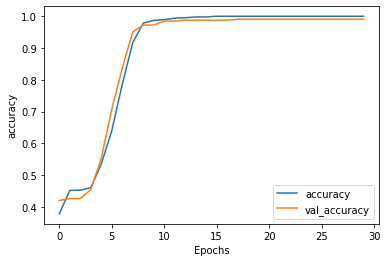

In [428]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_'+'accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_'+'accuracy'])
plt.show()


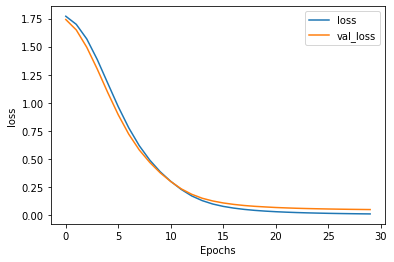

In [429]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_'+'loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss', 'val_'+'loss'])
plt.show()

array([3, 4])

In [448]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(eval_labels, np.argmax(model.predict(eval_padded),-1))
cnf_matrix

array([[83,  0,  0,  0,  0],
       [ 0, 78,  0,  0,  0],
       [ 0,  0, 66,  0,  0],
       [ 0,  2,  1, 47,  0],
       [ 0,  0,  0,  0, 47]])